In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
%matplotlib inline

## read and describe the metadata

In [5]:
fpn_csv = '/Users/junelee/Documents/Parsons/_MACHINE LEARNING/ML_assignment_3/option_2/cluster_images - cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [6]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [7]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,259,Lucas Blalock,The Covered Piano,NaN,Ramen Crucible gallery and MoMA,America,0,photography,"photo, archival inkjet print",188 x 185 cm,...,0,1,0,1,4,0,0,3,5,deliberately awkwardly photoshopped 'still lif...
1,243,Samantha Hobson,Wave Burst,NaN,japingkaaboriginalart.com,Australia,0,painting,"painting, acrylic on linen",102 x 78 cm,...,0,3,2,2,4,0,0,5,0,"acrylic, parallel thin lines as if viscous sur..."
2,387,Jeff Koons,Balloon Dog,supports/surfaces,Jeff Koons website,America,0,sculpture,"sculpture, mirror-polished stainless steel w/ ...",307 x 363 x 114 cm,...,0,4,0,0,4,0,0,0,5,"steel made to resemble a balloon, play of ball..."
3,242,Gloria Petyarre,Bush Medicine Leaves,NaN,japingkaaboriginalart.com,Australia,0,painting,"painting, acrylic on linen",90 x 60 cm,...,3,0,1,4,0,0,0,5,0,curved parallel thick short lines creating sur...
4,301,Stan Brakhage,23rd Psalm Branch (Part 1 & 2),NaN,MoMA,America,0,photography,"photo, film still, 16mm film (color, silent)",64 min film,...,4,4,4,0,4,0,5,0,5,"intense pools of color, different values, is t..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [329]:
data['year-scaled'] = (data['date'].astype(float))-1513

# we want to reassign values from one of the strings in the array below to an integer between 1 and 7
categories = ["drawing", "installation", "painting", "photography", "print", "sculpture", "video_film"]

data['medium_transformed'] = categories.index(data["primary_medium"].any())+1

movement_categories = []

if data["art_movement"] not in movement_categories:
	movement_categories.append(data["art_movement"].any())

data["art_movement_transformed"] = movement_categories.index(data["art_movement"].any()) + 1


X = data[['year-scaled', 'medium_transformed', 'art_movement_transformed']]        
# X = data[['te', 'co', 'li','spatial_dimension', 'year-scaled', 'medium_transformed', 'art_movement_transformed']]        



# X = data[['spatial_dimension', 'representation','year-scaled', 'medium_transformed', 'art_movement_transformed']]        
# X = data[['va', 'te', 'co', 'spatial_dimension', 'representation','year-scaled', 'medium_transformed', 'art_movement_transformed']]

In [330]:
X.head()

,year-scaled,medium_transformed,art_movement_transformed
0,502.0,4,1
1,487.0,4,1
2,481.0,4,1
3,477.0,4,1
4,453.0,4,1


# KMeans

In [331]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

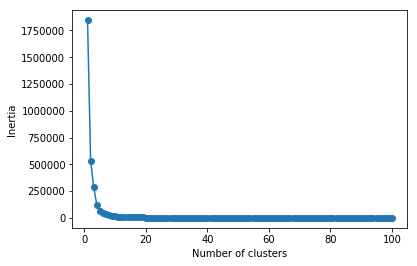

In [332]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [344]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [25, 40, 45, 30]

For n_clusters = 25 The average silhouette_score is : 0.5562585210775475


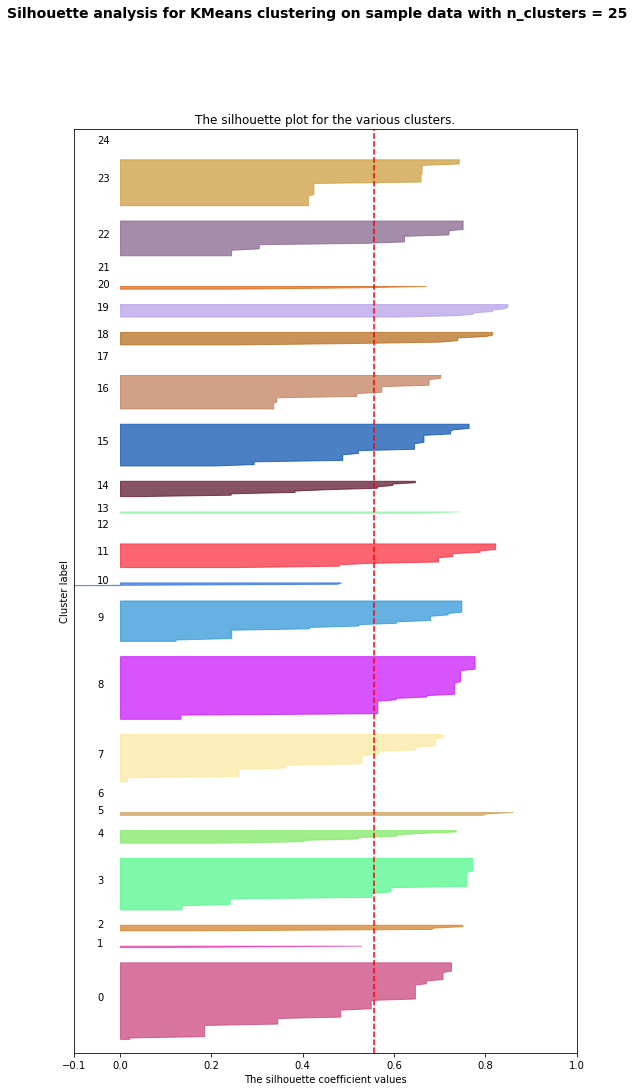

For n_clusters = 40 The average silhouette_score is : 0.5863977186788404


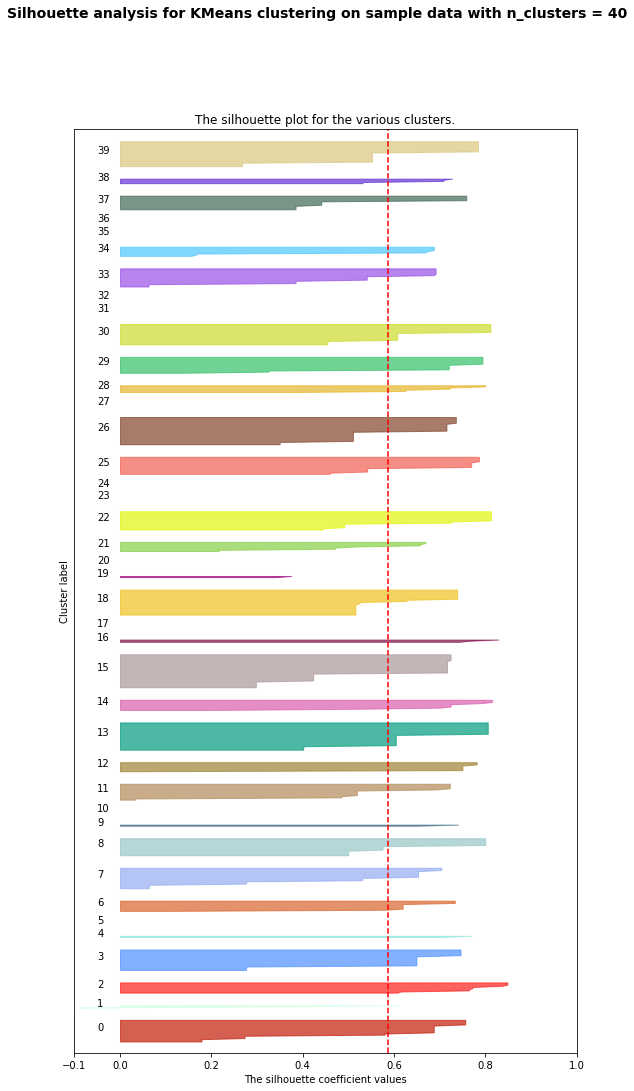

For n_clusters = 45 The average silhouette_score is : 0.5796346812892598


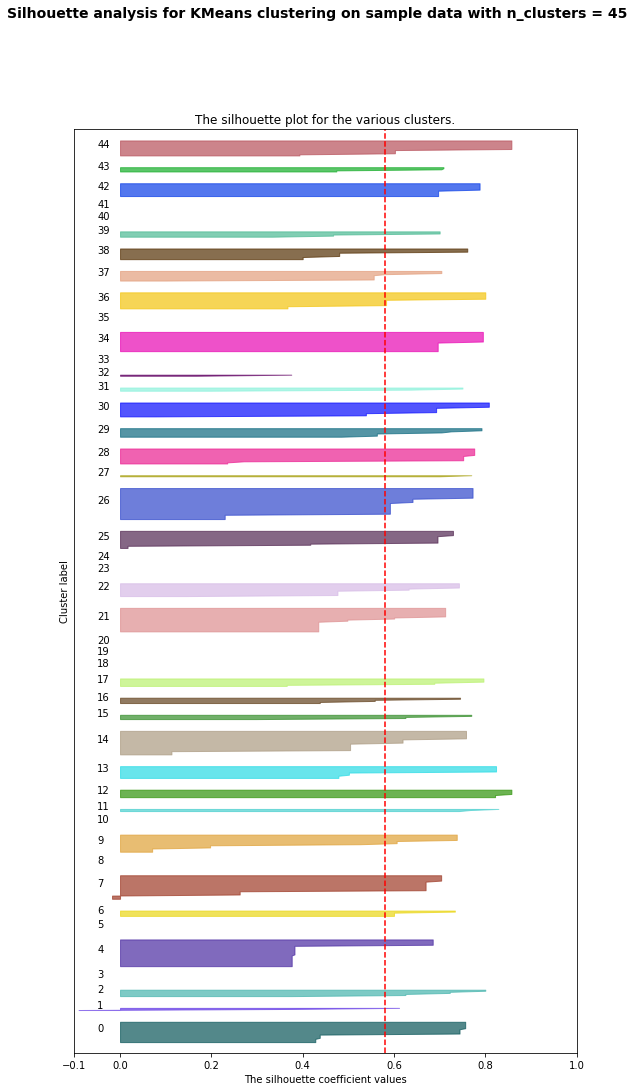

For n_clusters = 30 The average silhouette_score is : 0.5701430514064436


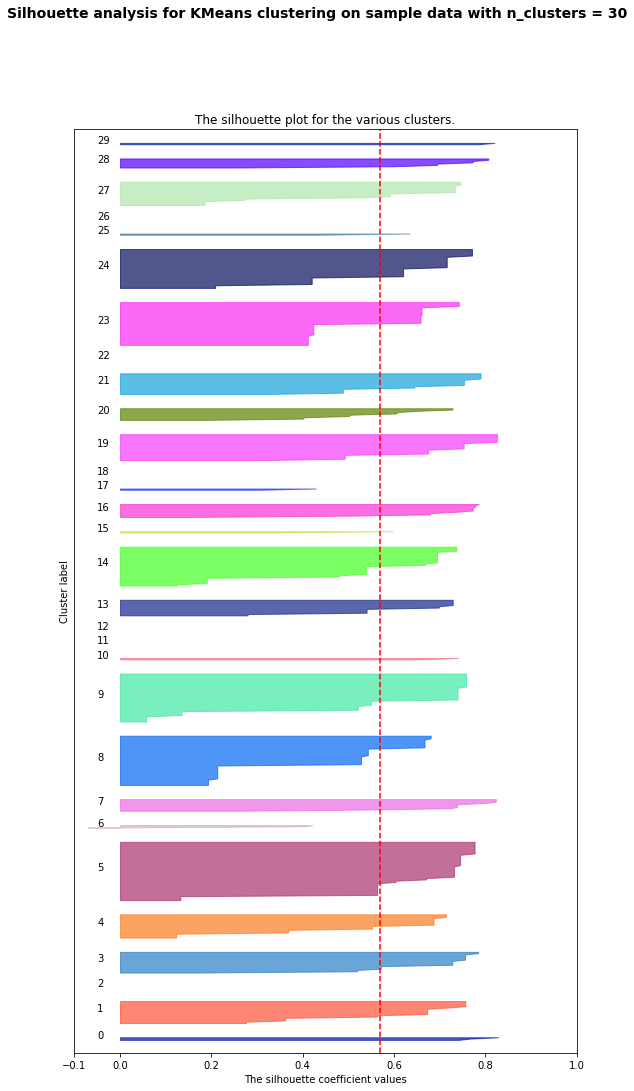

In [345]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [346]:
# after hours of trial and error, I realized that the clusters became more clear with more clusters, and less features.
# 40 was a good number, where I could identify unique elements of most clusters

my_n_clusters = 40

In [347]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [348]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
5_small.jpg
165_small.jpg
166_small.jpg
167_small.jpg
168_small.jpg
169_small.jpg
170_small.jpg
171_small.jpg
172_small.jpg
173_small.jpg
174_small.jpg
175_small.jpg
176_small.jpg
177_small.jpg
178_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
10_small.jpg
402_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 2
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
381_small.jpg
382_small.jpg
383_small.jpg
384_small.jpg
385_small.jpg
386_small.jpg
387_small.jpg
388_small.jpg
389_small.jpg
390_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 3
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
399_small.jpg
400_small.jpg
 
* * * * * * * *

In [349]:
import webbrowser

In [350]:
# write-html.py

f = open('clustering_results.html','w')
html_content1 = """<html>
<head></head>
<body>
"""
f.write(html_content1)

for i in range(0, max(km.labels_)+1):
    result = "<br> * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *<br> "
    result = result + "Images in cluster: " + str(i) + '<br>'
    result = result + "* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * <br>" 
    f.write(result)
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            img_file = '<img src = "img_small/' + str(j+2) + "_small.jpg" + '" height = 100px>'
            space = """
            """
            f.write(img_file)
            f.write(space)

html_content2 = """
</body>
</html>"""

f.write(html_content2)
f.close()